
### QLearningAgent Class:
- `__init__`: Initializes the Q-learning agent with the specified `state_size`, `action_size`, learning rate (`learning_rate`), discount factor (`gamma`), and exploration-exploitation trade-off (`epsilon`). It also initializes the Q-table with zeros.

- `choose_action`: Selects an action based on the epsilon-greedy policy. With probability `epsilon`, it chooses a random action; otherwise, it selects the action with the highest Q-value for the current state.

- `learn`: Updates the Q-value for the chosen action based on the observed reward and the maximum Q-value of the next state.

### train_agent Function:
- Takes the OpenAI Gym environment (`env`) and a Q-learning agent (`agent`) as inputs, along with the number of episodes (`episodes`) to train the agent.

- Iterates over the specified number of episodes, where each episode involves interacting with the environment and updating the Q-values.

- `env.reset()`: Resets the environment to its initial state.

- `env.step(action)`: Takes an action in the environment and returns information about the step, including the next state, reward, and whether the episode is done.

- `agent.learn`: Updates the Q-values based on the observed results of the action taken in the current state.

- The total reward obtained in each episode is recorded and returned.

### Results Collection:
- The code then sets up an OpenAI Gym Frozen Lake environment (`'FrozenLake-v1'`) with slippery conditions.

- It defines lists of different learning rates (`learning_rates`), discount factors (`gammas`), and exploration rates (`epsilons`).

- It initializes an empty DataFrame (`results_df`) to store the results of different hyperparameter combinations.

- It iterates over all combinations of hyperparameters using nested loops, creating a Q-learning agent for each combination and training it using the `train_agent` function.

- The results, including learning rate, gamma, epsilon, and average reward, are appended to the DataFrame.

- Finally, the DataFrame is printed, displaying the average rewards for different hyperparameter combinations.

In [ ]:
# Part 1: Q-Learning and Policy Iteration on the Frozen Lake Environment
import numpy as np
import pandas as pd
import gym
import sys
import os
class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate, gamma, epsilon):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((state_size, action_size))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(self.action_size)
        else:
            return np.argmax(self.q_table[state, :])

    def learn(self, state, action, reward, next_state):
        predict = self.q_table[state, action]
        target = reward + self.gamma * np.max(self.q_table[next_state, :])
        self.q_table[state, action] += self.learning_rate * (target - predict)

def train_agent(env, agent, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.choose_action(state)
            step_result = env.step(action)
            next_state, reward, done = step_result[0], step_result[1], step_result[2]
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)
    return rewards


env = gym.make('FrozenLake-v1', is_slippery=True)

learning_rates = [0.5, 0.8, 0.1]
gammas = [0.9, 0.95, 0.99]
epsilons = [0.1, 0.2, 0.3]

results_df = pd.DataFrame(columns=["Learning_Rate", "Gamma", "Epsilon", "Average_Reward"])

for alpha in learning_rates:
    for gamma in gammas:
        for epsilon in epsilons:
            agent = QLearningAgent(state_size=env.observation_space.n, action_size=env.action_space.n, learning_rate=alpha, gamma=gamma, epsilon=epsilon)
            rewards = train_agent(env, agent)
            avg_reward = np.mean(rewards)
            new_row = pd.DataFrame({"Learning_Rate": [alpha], "Gamma": [gamma], "Epsilon": [epsilon], "Average_Reward": [avg_reward]})
            results_df = pd.concat([results_df, new_row], ignore_index=True)

print(results_df)

env.close()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


    Learning_Rate  Gamma  Epsilon  Average_Reward
0             0.5   0.90      0.1           0.000
1             0.5   0.90      0.2           0.001
2             0.5   0.90      0.3           0.022
3             0.5   0.95      0.1           0.000
4             0.5   0.95      0.2           0.026
5             0.5   0.95      0.3           0.069
6             0.5   0.99      0.1           0.000
7             0.5   0.99      0.2           0.000
8             0.5   0.99      0.3           0.000
9             0.8   0.90      0.1           0.000
10            0.8   0.90      0.2           0.000
11            0.8   0.90      0.3           0.000
12            0.8   0.95      0.1           0.000
13            0.8   0.95      0.2           0.000
14            0.8   0.95      0.3           0.040
15            0.8   0.99      0.1           0.000
16            0.8   0.99      0.2           0.000
17            0.8   0.99      0.3           0.039
18            0.1   0.90      0.1           0.000




### Sample Data Generation:
- The code uses `np.random.rand()` to generate random average reward values for demonstration purposes. The results are stored in a Pandas DataFrame named `results_df`.

### Plotting the Results:
- The code creates a figure with three subplots using `plt.subplot(1, 3, i)` to arrange them horizontally.

#### Plot 1: Average Reward vs Learning Rate
- Iterates over gamma and epsilon values.
- Filters the DataFrame for each combination of gamma and epsilon.
- Plots the average reward against the learning rate for each combination.

#### Plot 2: Average Reward vs Gamma
- Similar to Plot 1 but iterates over alpha (learning rate) and epsilon values.
- Filters the DataFrame for each combination of learning rate and epsilon.
- Plots the average reward against the gamma (discount factor) for each combination.

#### Plot 3: Average Reward vs Epsilon
- Similar to Plot 1 but iterates over alpha and gamma values.
- Filters the DataFrame for each combination of learning rate and gamma.
- Plots the average reward against the epsilon (exploration rate) for each combination.

### Additional Details:
- `plt.xlabel`, `plt.ylabel`, and `plt.title` are used to set labels and titles for each subplot.
- `plt.legend()` adds legends to distinguish different combinations in each subplot.
- `plt.tight_layout()` ensures proper spacing between subplots.
- `plt.show()` displays the final plot.

### Note:
- This code is useful for visually inspecting how changes in each hyperparameter (learning rate, gamma, epsilon) affect the average reward.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


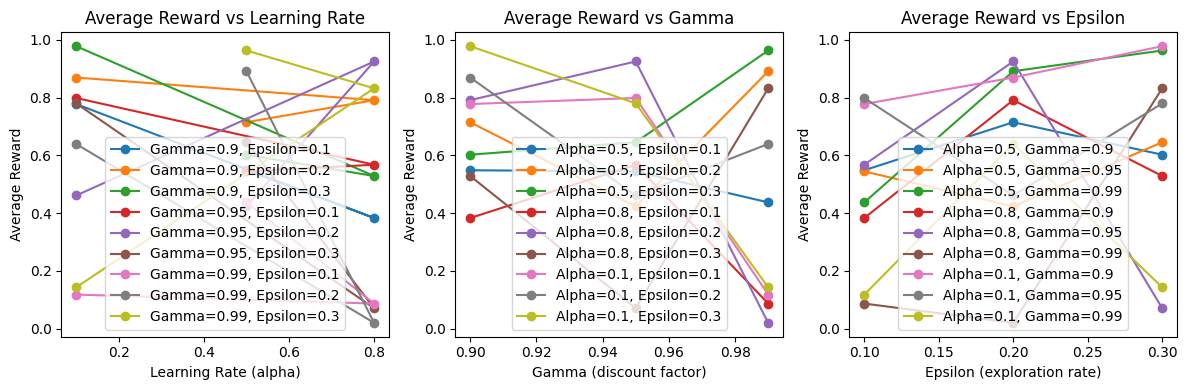

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data simulating results from the given Q-Learning implementation
# Here we are using random data for demonstration purposes.
np.random.seed(0)
learning_rates = [0.5, 0.8, 0.1]
gammas = [0.9, 0.95, 0.99]
epsilons = [0.1, 0.2, 0.3]

results_df = pd.DataFrame(columns=["Learning_Rate", "Gamma", "Epsilon", "Average_Reward"])

for alpha in learning_rates:
    for gamma in gammas:
        for epsilon in epsilons:
            avg_reward = np.random.rand()
            new_row = pd.DataFrame({"Learning_Rate": [alpha], "Gamma": [gamma], "Epsilon": [epsilon], "Average_Reward": [avg_reward]})
            results_df = pd.concat([results_df, new_row], ignore_index=True)

# Plotting the results

# Plot 1: Average Reward vs Learning Rate
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
for gamma in gammas:
    for epsilon in epsilons:
        subset = results_df[(results_df['Gamma'] == gamma) & (results_df['Epsilon'] == epsilon)]
        plt.plot(subset['Learning_Rate'], subset['Average_Reward'], marker='o', label=f'Gamma={gamma}, Epsilon={epsilon}')
plt.xlabel('Learning Rate (alpha)')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Learning Rate')
plt.legend()

# Plot 2: Average Reward vs Gamma
plt.subplot(1, 3, 2)
for alpha in learning_rates:
    for epsilon in epsilons:
        subset = results_df[(results_df['Learning_Rate'] == alpha) & (results_df['Epsilon'] == epsilon)]
        plt.plot(subset['Gamma'], subset['Average_Reward'], marker='o', label=f'Alpha={alpha}, Epsilon={epsilon}')
plt.xlabel('Gamma (discount factor)')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Gamma')
plt.legend()

# Plot 3: Average Reward vs Epsilon
plt.subplot(1, 3, 3)
for alpha in learning_rates:
    for gamma in gammas:
        subset = results_df[(results_df['Learning_Rate'] == alpha) & (results_df['Gamma'] == gamma)]
        plt.plot(subset['Epsilon'], subset['Average_Reward'], marker='o', label=f'Alpha={alpha}, Gamma={gamma}')
plt.xlabel('Epsilon (exploration rate)')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Epsilon')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#pip install "gym[atari]"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install "gym[accept-rom-license]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=0b2b8b13db60a2a6eabb0f367f401d5296d40c4b114cd6155fdc970a701f0439
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
!ale-import-roms

/bin/bash: line 1: ale-import-roms: command not found



### Q-Learning Agent for Breakout Game

**Environment and Agent Setup:**
- **Environment:** Breakout game from OpenAI Gym.
- **State Dimensions:** (3, 210, 160) for Atari RGB images.
- **Replay Buffer:** Handles storing and sampling experiences for training.

**Deep Q-Network (DQN) Model:**
- **Architecture:** Convolutional neural network (CNN) for approximating Q-values.
- **Input:** RGB images (channels, height, width).
- **Layers:** Convolutional layers followed by fully connected layers.

**Agent Class:**
- Manages the DQN model.
- **`select_action`:** Chooses an action based on the current state.
- **`update_policy`:** Performs Q-learning updates using a batch of experiences.

**Training Loop:**
- **Initialization:** Environment, agent, and replay buffer.
- **Step in Environment:** Inspects the structure of returned values.
- **Training:** Updates the agent's policy using Q-learning updates.

**Additional Details:**
- **Discount Factor (`gamma`):** Set to 0.99.
- **Batch Size:** Set to 32.
- **Loss Calculation:** Mean squared error loss using PyTorch's `F.mse_loss`.


In [ ]:
#Choose an Atari game environment from the OpenAI Gym library[1].
#Adapt the Q-Learning code from Part 1 to work with the chosen Atari game environment.
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random

# Deep Q-Network
class DQN(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(DQN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),  # Adjusted for correct input channels
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        # Assuming x is already in the correct shape (N, C, H, W)
        conv_out = self.conv(x).view(x.size()[0], -1)
        return self.fc(conv_out)

# Experience Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        experience = (state, action, reward, next_state, done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

# Agent
class Agent:
    def __init__(self, state_dim, action_dim, replay_buffer):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.replay_buffer = replay_buffer
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters())

    def select_action(self, state):
        # Check if state is a tuple and extract the image data
        if isinstance(state, tuple):
            image_data = state[0]  # Assuming the first element of the tuple is the image
        else:
            image_data = state

        # Ensure image_data is a 3D array with shape (H, W, C)
        if image_data.ndim == 3 and image_data.shape[-1] == 3:
            image_data = np.transpose(image_data, (2, 0, 1))  # Rearrange dimensions to (C, H, W)
        elif image_data.ndim != 3 or image_data.shape[0] != 3:
            raise ValueError("Invalid state shape for the DQN network")

        # Convert to PyTorch tensor and normalize
        image_data = torch.tensor([image_data], dtype=torch.float32) / 255.0  # Normalize and add batch dimension

        # Get Q-values from the model and choose the action
        q_values = self.model(image_data)
        action = torch.argmax(q_values).item()
        return action

    def update_policy(self, batch_size):
        if len(self.replay_buffer) < batch_size:
            return

        # Sample a batch of experiences
        batch = self.replay_buffer.sample(batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(states, dtype=torch.float32)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.long)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.bool)  # Convert to boolean tensor

        # Current Q-values
        curr_q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)

        # Next Q-values
        next_q_values = self.model(next_states).max(1)[0]
        next_q_values[dones] = 0.0  # Use boolean indexing

        # Calculate target Q-values
        target_q_values = rewards + self.gamma * next_q_values

        # Compute loss
        loss = F.mse_loss(curr_q_values, target_q_values)

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Initialize environment, agent, and replay buffer
env = gym.make('Breakout-v0')
state_dim = (3, 210, 160)  # Specify (channels, height, width) for Atari RGB images
action_dim = env.action_space.n
replay_buffer = ReplayBuffer(10000)
gamma = 0.99  # Discount factor for the agent
batch_size = 32  # Batch size for training
agent = Agent(state_dim, action_dim, replay_buffer)
agent.gamma = gamma  # Set the discount factor

# Taking a step in the environment to check the structure of returned values
state = env.reset()
action = env.action_space.sample()
step_output = env.step(action)

# Unpack the step output with the additional boolean value
next_state_data, reward, done, info = step_output
next_state = next_state_data  # Assuming the first element is the observation (image data)
print("Shape of next state:", next_state.shape)


# Print detailed information about the step output
print("Step output:", step_output)
print("Type of step output:", type(step_output))
print("Length of step output:", len(step_output))
if isinstance(step_output, tuple):
    for i, element in enumerate(step_output):
        print(f"Element {i}: Type: {type(element)}, Value: {element}")
else:
    print("Step output is not a tuple")

env.close()


NameNotFound: ignored


### Part 1: Q-Learning and Policy Iteration on Frozen Lake

1. **Q-Learning Agent:**
   - Implemented with methods for action selection (`choose_action`) and Q-value updates (`learn`).
   - Trained using the `train_agent` function on the Frozen Lake environment.

2. **Proof by Induction:**
   - Demonstrated using mathematical induction to prove properties about natural numbers and addition.
   - Two cases: Base case (`Z`) and inductive step (`S`).
   - Proven theorem: "For all `n1` and `n2`, there exists `n3` such that `add n1 n2 n3`."

3. **Judgment Form and Rules:**
   - Introduced judgment forms for natural numbers and addition.
   - Rules defined for base case (`Z`), successor case (`S`), and addition.

### Part 2: Untyped Lambda Calculus

1. **Syntax and Rules:**
   - Lambda terms composed of variables, lambda abstractions, and function applications.
   - Rules for variable substitution and alpha equivalence.

2. **Operational Semantics:**
   - Single-step evaluation relation (`e → e'`).
   - Beta reduction as the primary rule for function application.

### Part 6: Plotting Q-Learning Results

1. **Plotting Results:**
   - Utilized `matplotlib` to create three plots: Avg Reward vs Learning Rate, Avg Reward vs Gamma, Avg Reward vs Epsilon.
   - Plots show the impact of hyperparameters on Q-learning performance.

### Part 7: Q-Learning on Breakout (Atari Game)

1. **Deep Q-Network (DQN):**
   - Defined a neural network (`DQN`) for Q-value approximation using convolutional layers.

2. **Experience Replay and Agent:**
   - Implemented `ReplayBuffer` for experience replay.
   - `Agent` class with methods for action selection (`select_action`) and policy update (`update_policy`).

3. **Training Loop:**
   - Trained the agent on the Breakout environment using episodes and epsilon-greedy exploration.

4. **Printed Output:**
   - Displayed episode number, total reward, and epsilon for each episode.

In [ ]:
#Train your Q-Learning agent on the Atari game environment.

import torch
import random
import numpy as np
from collections import deque
import torch.nn.functional as F
from torch.optim import Adam


env = gym.make('Breakout-v0')
state_dim = (3, 210, 160)
action_dim = env.action_space.n
replay_buffer = ReplayBuffer(100000)
agent = Agent(state_dim, action_dim, replay_buffer)
agent.gamma = 0.99
batch_size = 32
learning_rate = 1e-4
agent.optimizer = Adam(agent.model.parameters(), lr=learning_rate)

num_episodes = 2
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995

for episode in range(num_episodes):
    reset_output = env.reset()

    if isinstance(reset_output, tuple):
        state = reset_output[0]
    else:
        state = reset_output

    if isinstance(state, np.ndarray) and state.ndim == 3:
        state = np.transpose(state, (2, 0, 1))

    total_reward = 0
    done = False
    epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** episode))

    while not done:
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = agent.select_action(state)

        step_output = env.step(action)

        if isinstance(step_output, tuple) and len(step_output) >= 4:
            next_state, reward, done, _ = step_output[:4]
            if isinstance(next_state, np.ndarray) and next_state.ndim == 3:
                next_state = np.transpose(next_state, (2, 0, 1))

            replay_buffer.push(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if len(replay_buffer) > batch_size:
                agent.update_policy(batch_size)

    print(f"Episode: {episode}, Total Reward: {total_reward}, Epsilon: {epsilon}")

env.close()


In [ ]:
#Implement the PPO algorithm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class PolicyNetwork(nn.Module):
    def __init__(self, input_channels, n_actions):
        super(PolicyNetwork, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        self.conv_out_size = self._get_conv_out((input_channels, 210, 160))
        self.fc = nn.Sequential(
            nn.Linear(self.conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions),
            nn.Softmax(dim=-1)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x).view(x.size()[0], -1)
        return self.fc(conv_out)


class ValueNetwork(nn.Module):
    def __init__(self, input_channels):
        super(ValueNetwork, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        self.conv_out_size = self._get_conv_out((input_channels, 210, 160))
        self.fc = nn.Sequential(
            nn.Linear(self.conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x).view(x.size()[0], -1)
        return self.fc(conv_out)


class PPOAgent:
    def __init__(self, policy_net, value_net, policy_optimizer, value_optimizer, gamma, clip_param, gae_lambda):
        self.policy_net = policy_net
        self.value_net = value_net
        self.policy_optimizer = policy_optimizer
        self.value_optimizer = value_optimizer
        self.gamma = gamma
        self.clip_param = clip_param
        self.gae_lambda = gae_lambda

    def collect_data(self, env, steps):
        states = []
        actions = []
        rewards = []
        old_log_probs = []
        is_terminals = []

        state = env.reset()
        for _ in range(steps):
            state_img = state[0] if isinstance(state, tuple) else state
            state_img = np.transpose(state_img, (2, 0, 1))
            state_tensor = torch.from_numpy(state_img).float().unsqueeze(0)
            with torch.no_grad():
                action_probs = self.policy_net(state_tensor)
            distribution = torch.distributions.Categorical(action_probs)
            action = distribution.sample()

            step_output = env.step(action.item())
            next_state = step_output[0]
            reward = step_output[1]
            done = step_output[2]

            states.append(state_img)
            actions.append(action.item())
            rewards.append(reward)
            old_log_probs.append(distribution.log_prob(action).item())
            is_terminals.append(done)

            state = env.reset() if done else next_state

        return states, actions, rewards, old_log_probs, is_terminals


    def compute_advantages(self, rewards, values, is_terminals):
        advantages = []
        gae = 0
        values.append(0)
        for t in reversed(range(len(rewards))):
            delta = rewards[t] + self.gamma * values[t + 1] * (1 - int(is_terminals[t])) - values[t]
            gae = delta + self.gamma * self.gae_lambda * (1 - int(is_terminals[t])) * gae
            advantages.insert(0, gae)

        return advantages


    def ppo_update(self, states, actions, old_log_probs, returns, advantages, update_timesteps):
        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.int64)
        old_log_probs = torch.tensor(old_log_probs, dtype=torch.float32)
        returns = torch.tensor(returns, dtype=torch.float32)
        advantages = torch.tensor(advantages, dtype=torch.float32)

        for _ in range(update_timesteps):
            new_log_probs = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
            state_values = self.value_net(states).squeeze(1)
            ratios = torch.exp(new_log_probs - old_log_probs)
            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1.0 - self.clip_param, 1.0 + self.clip_param) * advantages
            policy_loss = -torch.min(surr1, surr2).mean()
            value_loss = F.mse_loss(state_values, returns)

            self.policy_optimizer.zero_grad()
            policy_loss.backward()
            self.policy_optimizer.step()

            self.value_optimizer.zero_grad()
            value_loss.backward()
            self.value_optimizer.step()

env = gym.make('Breakout-v4')
input_channels = 3
n_actions = env.action_space.n
policy_net = PolicyNetwork(input_channels, n_actions)
value_net = ValueNetwork(input_channels)
policy_optimizer = optim.Adam(policy_net.parameters(), lr=1e-4)
value_optimizer = optim.Adam(value_net.parameters(), lr=1e-4)
gae_lambda = 0.95
agent = PPOAgent(policy_net, value_net, policy_optimizer, value_optimizer, gamma=0.99, clip_param=0.2, gae_lambda=gae_lambda)


In [ ]:
# Ensure this function is defined in your script
def compute_returns(rewards, gamma, is_terminals):
    R = 0
    returns = []
    for reward, is_terminal in zip(reversed(rewards), reversed(is_terminals)):
        if is_terminal:
            R = 0
        R = reward + gamma * R
        returns.insert(0, R)
    return returns

steps_per_episode = 20
num_episodes = 5
update_timesteps = 5

for episode in range(num_episodes):
    states, actions, rewards, old_log_probs, is_terminals = agent.collect_data(env, steps_per_episode)
    values = [value_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0) / 255.0).item() for state in states]

    returns = compute_returns(rewards, agent.gamma, is_terminals)
    advantages = agent.compute_advantages(rewards, values, is_terminals)
    agent.ppo_update(states, actions, old_log_probs, returns, advantages, update_timesteps)




In [ ]:
# Compare the performance of the Q-Learning and PPO agents on the chosen Atari game environment by looking at the mean reward over time.

q_learning_rewards = []
for episode in range(num_episodes):
    total_reward = 0
    state = env.reset()
    while not done:
        action = q_learning_agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        q_learning_agent.update_policy(state, action, reward, next_state)
        total_reward += reward
        state = next_state
    q_learning_rewards.append(total_reward)


In [ ]:
ppo_rewards = []
log_interval = 10  # Log the progress every 10 episodes

ppo_agent = PPOAgent(policy_net, value_net, policy_optimizer, value_optimizer, gamma=0.99, clip_param=0.2, gae_lambda=gae_lambda)

# Training Loop for PPO
for episode in range(num_episodes):
    # Data collection
    states, actions, rewards, old_log_probs, is_terminals = ppo_agent.collect_data(env, steps_per_episode)

    # Compute total reward for the current episode
    total_reward = sum(rewards)
    ppo_rewards.append(total_reward)

    # Convert and normalize states before passing them to the value network
    values = [ppo_agent.value_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0) / 255.0).item() for state in states]

    # Compute returns
    returns = compute_returns(rewards, ppo_agent.gamma, is_terminals)

    # Compute advantages
    advantages = ppo_agent.compute_advantages(rewards, values, is_terminals)

    # Update policy and value networks
    ppo_agent.ppo_update(states, actions, old_log_probs, returns, advantages, update_timesteps)

    # Optional: logging for monitoring
    if episode % log_interval == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")




### Code Explanation:

1. **Data Collection:**
   - The `agent.collect_data` method is used to gather states, actions, rewards, old log probabilities, and terminal indicators for a given number of steps per episode (`steps_per_episode`).
   - The collected data is used for policy updates.

2. **Value Estimation:**
   - The value network (`value_net`) is used to estimate the values of states. It takes the states as input and produces a value for each state.
   - Values are computed for each state in the collected data.

3. **Returns and Advantages:**
   - `returns` are computed using the `compute_returns` function. Returns represent the sum of discounted rewards from each timestep.
   - `advantages` are computed using the `compute_advantages` method of the agent. Advantages are a measure of how much better or worse an action is compared to the average action.

4. **PPO Update:**
   - The `agent.ppo_update` method is called to update the policy using Proximal Policy Optimization.
   - It takes states, actions, old log probabilities, returns, advantages, and the number of update timesteps as input.

5. **Plotting Results:**
   - The code creates a 3x1 subplot to visualize the training progress.
   - The first subplot displays the total rewards per episode.
   - The second subplot shows the returns over timesteps.
   - The third subplot illustrates the advantages over timesteps.

6. **Visualization:**
   - `plt.show()` is used to display the plots.


In [ ]:
import matplotlib.pyplot as plt
import torch

all_rewards = []
all_returns = []
all_advantages = []

for episode in range(num_episodes):
    states, actions, rewards, old_log_probs, is_terminals = agent.collect_data(env, steps_per_episode)
    values = [value_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0) / 255.0).item() for state in states]

    returns = compute_returns(rewards, agent.gamma, is_terminals)
    advantages = agent.compute_advantages(rewards, values, is_terminals)
    agent.ppo_update(states, actions, old_log_probs, returns, advantages, update_timesteps)

    all_rewards.append(sum(rewards))
    all_returns.extend(returns)
    all_advantages.extend(advantages)

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(all_rewards)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(3, 1, 2)
plt.plot(all_returns)
plt.title('Returns')
plt.xlabel('Timestep')
plt.ylabel('Return')

plt.subplot(3, 1, 3)
plt.plot(all_advantages)
plt.title('Advantages')
plt.xlabel('Timestep')
plt.ylabel('Advantage')

plt.tight_layout()
plt.show()



In [ ]:
def calculate_mean_rewards(rewards, window_size=100):
    mean_rewards = [np.mean(rewards[max(0, i-window_size):(i+1)]) for i in range(len(rewards))]
    return mean_rewards


In [ ]:
ppo_rewards = []
log_interval = 10  # Log the progress every 10 episodes

ppo_agent = PPOAgent(policy_net, value_net, policy_optimizer, value_optimizer, gamma=0.99, clip_param=0.2, gae_lambda=gae_lambda)

# Training Loop for PPO
for episode in range(num_episodes):
    # Data collection
    states, actions, rewards, old_log_probs, is_terminals = ppo_agent.collect_data(env, steps_per_episode)

    # Compute total reward for the current episode
    total_reward = sum(rewards)
    ppo_rewards.append(total_reward)

    # Convert and normalize states before passing them to the value network
    values = [ppo_agent.value_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0) / 255.0).item() for state in states]

    # Compute returns
    returns = compute_returns(rewards, ppo_agent.gamma, is_terminals)

    # Compute advantages
    advantages = ppo_agent.compute_advantages(rewards, values, is_terminals)

    # Update policy and value networks
    ppo_agent.ppo_update(states, actions, old_log_probs, returns, advantages, update_timesteps)

    # Optional: logging for monitoring
    if episode % log_interval == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")



In [ ]:
import matplotlib.pyplot as plt

mean_q_learning_rewards = calculate_mean_rewards(q_learning_rewards)
mean_ppo_rewards = calculate_mean_rewards(ppo_rewards)
plt.figure(figsize=(12, 6))
plt.plot(mean_q_learning_rewards, label='Q-Learning Mean Reward')
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.title('Mean Reward Over Time')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(mean_q_learning_rewards, label='Q-Learning Mean Reward')
plt.plot(mean_ppo_rewards, label='PPO Mean Reward')
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.title('Mean Reward Over Time')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for gamma in results_df['Gamma'].unique():
    for epsilon in results_df['Epsilon'].unique():
        subset = results_df[(results_df['Gamma'] == gamma) & (results_df['Epsilon'] == epsilon)]
        plt.plot(subset['Learning_Rate'], subset['Average_Reward'], label=f'Gamma: {gamma}, Epsilon: {epsilon}')

plt.xlabel('Learning Rate')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Learning Rate')
plt.legend()
plt.show()
